In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from ipywidgets import interactive
from scipy.fftpack import fft, ifft,ifftshift,fftshift
from IPython.display import display, HTML
from scipy.linalg import circulant
from scipy.linalg import toeplitz, hankel
from IPython.display import clear_output
from scipy.linalg import expm


#### --------- Definition of variables ------------------------

N_size=200001 #
Gamma=0.5
Lambda=0.5

#### ------------------------------------------------------------

display(HTML("""
<style>
.output {
    display: flex;
    align-items: left;
    text-align: center;
}
</style>
"""))

def Alpha(Gamma,Lambda,theta):
    return Lambda+np.cos(theta)
def Beta(Gamma,Lambda,theta):
    return Gamma*np.sin(theta)
def Omega(Gamma,Lambda,theta):
    return np.sqrt(Alpha(Gamma,Lambda,theta)**2 + Beta(Gamma,Lambda,theta)**2 )
def Phi(Gamma,Lambda,theta):
    return np.arctan2(Beta(Gamma,Lambda,theta),Alpha(Gamma,Lambda,theta))




def Fermi_dirac(beta,mu,n,Gamma=Gamma,Lambda=Lambda,N=N_size):
    # beta is the inverse thermic energy associated in the system (beta)
    # mu corresponds to the chemical potential
    # n is the position of the particle
    # f=np.exp(T*(Omega(Gamma,Lambda,2.0*(np.pi/N)*n)-mu)) +1
    # N corresponds to the size of the system
    f=np.exp(beta*(Omega(Gamma,Lambda,((2.*np.pi)/float(N)) * n)-mu)) +1
    return 1/f

def plot_interactive(beta,mu):
    plt.figure(figsize=(10,7))
    n=np.arange(-(N_size-1)/2,(N_size-1)/2+ 1)
    plt.subplot(2,1,1)
    plt.plot(n,Fermi_dirac(beta,mu,n))
    #plt.ylim(-0.05,1.05)
    plt.xlabel("Position")
    plt.ylabel("Probability")
    plt.subplot(2,1,2)
    plt.plot(n,Omega(Gamma,Lambda,(2.*np.pi)/float(N_size)*n),label=r"$\Omega$")
    plt.show()

    
def Binary_entropy(x):
    result=[]
    for i in x:
        if np.abs(i-1)<10E-10:
            result.append(0)
        else:
            result.append(-i*np.log(i)-(1-i)*np.log(1-i))
    return np.array(result)

def Get_Bands_Matrix(Gamma=Gamma,Lambda=Lambda,N_size=N_size,beta=0.40824,mu=0,Ground =False):
    if Ground:
        x=np.arange(0,(N_size-1)/2+ 1)
        m_cos=[-0.5 for i in x]
        m_sin=[-0.5 for i in x]
        
        x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)

        M_minous=[((m_cos[np.abs(int(i))]-m_sin[np.abs(int(i))])*0.5*np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i)))) for i in x]
        M_plus = [((m_cos[np.abs(int(i))]+m_sin[np.abs(int(i))])*0.5*np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i)))) for i in x]
        Mminousband=np.array(M_minous)
        Mplusband=np.array(M_plus)
        #m_cos=np.array(m_cos[1:][::-1]+m_cos)
        #m_sin=np.array(m_sin[1:][::-1]+m_sin)
        #M_plus=(m_cos+m_sin)*0.5
        #M_minous=(m_cos-m_sin)*0.5
        #x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)
        #Mplusband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
        #Mplusband=M_plus*np.array(Mplusband)
        #Mminousband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
        #Mminousband=M_minous*np.array(Mminousband)
        
    else:
        x=np.arange(0,(N_size-1)/2+ 1)
        m_cos=[-0.5 if np.random.random()>Fermi_dirac(beta,mu,n=i) else 0.5 for i in x]
        m_sin=[-0.5 if np.random.random()>Fermi_dirac(beta,mu,n=i) else 0.5 for i in x]
        x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)

        M_minous=[((m_cos[np.abs(int(i))]-m_sin[np.abs(int(i))])*0.5*np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i)))) for i in x]
        M_plus = [((m_cos[np.abs(int(i))]+m_sin[np.abs(int(i))])*0.5*np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i)))) for i in x]
        Mminousband=np.array(M_minous)
        Mplusband=np.array(M_plus)
        
        #m_cos=np.array(m_cos[1:][::-1]+m_cos)
        #m_sin=np.array(m_sin[1:][::-1]+m_sin)
        #M_plus=(m_cos+m_sin)*0.5
        #M_minous=(m_cos-m_sin)*0.5
        #x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)
        #Mplusband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
        #Mplusband=M_plus*np.array(Mplusband)
        #Mminousband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
        #Mminousband=M_minous*np.array(Mminousband)
        
    x=np.arange(-(N_size-1)/2,(N_size-1)/2+ 1)
    Fourier_plus=fft(ifftshift(Mplusband))
    Fourier_minous=fft(ifftshift(Mminousband))
    return Fourier_plus/N_size,Fourier_minous/N_size

def Toeplitz_matrix(Fourier_plus,L):
    First_column = Fourier_plus[:L]
    First_row = np.roll(Fourier_plus,-1)[::-1][:L]
    #First_column=np.roll(Fourier_plus,-1)[::-1][:L]
    #First_row = Fourier_plus[:L]
    return toeplitz(First_column,First_row)
def Hankel_matrix(Fourier_minous,L):
    to_use=Fourier_minous[:2*L-1]
    First_column=to_use[:L]
    Last_row=np.roll(to_use,-L+1)[:L]
    #np.roll(Fourier_minous,L-1)[::-1][:L]
    return hankel(First_column,Last_row)

def Covariance_matrix(L,Gamma=Gamma,Lambda=Lambda,beta=0.40824,mu=0,N_size=N_size,Ground=False):
    if Ground:
        Fourier_plus,Fourier_minous=Get_Bands_Matrix(Gamma=Gamma,Lambda=Lambda,N_size=N_size,beta=beta,mu=mu,Ground=True)
    else:
        Fourier_plus,Fourier_minous=Get_Bands_Matrix(Gamma=Gamma,Lambda=Lambda,N_size=N_size,beta=beta,mu=mu,Ground=False)
    return (Toeplitz_matrix(Fourier_plus,L)+Hankel_matrix(Fourier_minous,L))/N_size

def Covariance_matrix_from_sub_sample(Fourier_plus,Fourier_minous,L):
    return (Toeplitz_matrix(Fourier_plus,L)+Hankel_matrix(Fourier_minous,L))

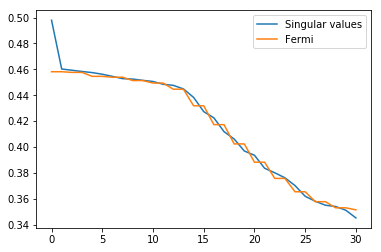

In [2]:
L=31
beta=0.40824
mu=0
a,b=Get_Bands_Matrix(Ground=False,N_size=N_size)
New_cov_matrix=Covariance_matrix_from_sub_sample(a,b,L)
S=np.linalg.svd(New_cov_matrix,compute_uv=False)
S=-S+0.5
plt.plot(sorted(S,reverse=True),label="Singular values")
n=np.arange(-(L-1)/2,(L-1)/2+ 1)
to_plot=sorted(Fermi_dirac(beta,mu,n,N=L),reverse=True)
plt.plot(to_plot,label="Fermi")
plt.legend()

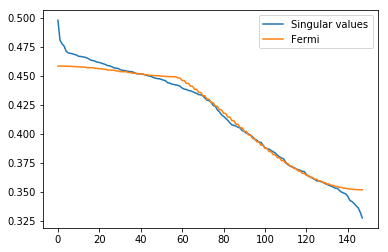

In [3]:
for L in range(7,151,3):
    clear_output(wait=True)
    New_cov_matrix=Covariance_matrix_from_sub_sample(a,b,L)
    S=np.linalg.svd(New_cov_matrix,compute_uv=False)
    S=-S+0.5
    plt.plot(sorted(S,reverse=True),label="Singular values")
    n=np.arange(-(L-1)/2,(L-1)/2+ 1)
    to_plot=sorted(Fermi_dirac(beta,mu,n,N=L),reverse=True)
    plt.plot(to_plot,label="Fermi")
    plt.legend()
    plt.show()

In [4]:
L=31
New_cov_matrix=Covariance_matrix_from_sub_sample(a,b,L)
A,S,B=np.linalg.svd(New_cov_matrix)
O_1,S,O_2=np.linalg.svd(New_cov_matrix)
S=-S+0.5
x=np.log((1-S)/(S))

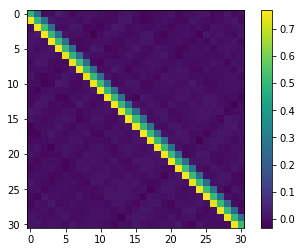

In [5]:
M=(-(O_1@np.diag(x)/beta@O_2).real)
plt.imshow(M)
plt.colorbar()

In [6]:
lower_band=np.array([[M[i,j] for i in range(1,L) if i-j == 1] for j in range(L-1)]).reshape(L-1)
upper_band=np.array([[M[i,j] for i in range(L) if i-j == -1] for j in range(1,L)]).reshape(L-1)
diag=M.diagonal()

In [8]:
a_0=Lambda
a_1=0.5*(1-Gamma)
a_2=0.5*(1+Gamma)
A=np.zeros((L,L))
for i in range(L):
    for j in range(L):
        if i==j:
            A[i,j] = a_0
        elif (i-j) % L == 1:
            A[i,j] = a_2
        elif (j-i) % L == 1:
            A[i,j] = a_1

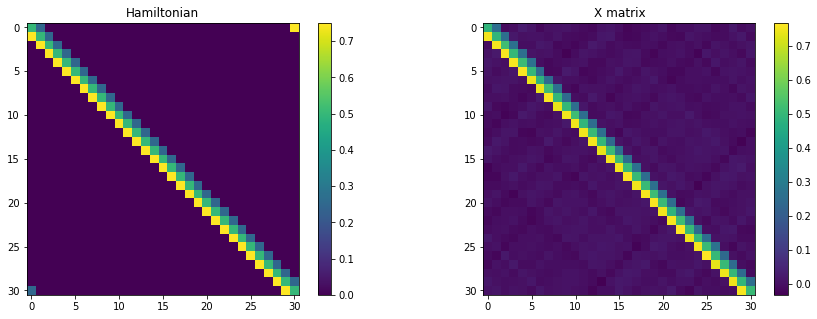

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(A)
plt.colorbar()
plt.title("Hamiltonian")
plt.subplot(1,2,2)
plt.title("X matrix")
M=(-(O_1@np.diag(x)/beta@O_2).real)
plt.imshow(M)
plt.colorbar()
plt.show()

# Test to make averages and see that the density matrix is approximating to the Hamiltonian

In [59]:
tests=500
N_size=50001
L=31
results=np.zeros((tests,2*L-1,2))
for test in range(tests):
    print("Test number {}".format(test))
    a,b=Get_Bands_Matrix(Ground=False,N_size=N_size)
    a,b=a.real,b.real
    results[test,:,0]=np.append(a[:L],a[-L+1:]) #np.append(a[:L],np.roll(a,-1)[::-1][:L]) # to re do the toeplitz matrix 
    #take the fisrt [:L] elements as the fisrt columns and the rest [L:] as the fisrt row (teoplitz)
    results[test,:,1]=b[:2*L-1] #np.append(to_use_Hankel[:L],np.roll(to_use_Hankel,-L+1)[:L]) # to re do the Hankel matrix 
    #take the fisrt [:L] elements as the fisrt columns and the rest [L:] as the last row (Hankel)

Test number 0
Test number 1
Test number 2
Test number 3
Test number 4
Test number 5
Test number 6
Test number 7
Test number 8
Test number 9
Test number 10
Test number 11
Test number 12
Test number 13
Test number 14
Test number 15
Test number 16
Test number 17
Test number 18
Test number 19
Test number 20
Test number 21
Test number 22
Test number 23
Test number 24
Test number 25
Test number 26
Test number 27
Test number 28
Test number 29
Test number 30
Test number 31
Test number 32
Test number 33
Test number 34
Test number 35
Test number 36
Test number 37
Test number 38
Test number 39
Test number 40
Test number 41
Test number 42
Test number 43
Test number 44
Test number 45
Test number 46
Test number 47
Test number 48
Test number 49
Test number 50
Test number 51
Test number 52
Test number 53
Test number 54
Test number 55
Test number 56
Test number 57
Test number 58
Test number 59
Test number 60
Test number 61
Test number 62
Test number 63
Test number 64
Test number 65
Test number 66
Test 

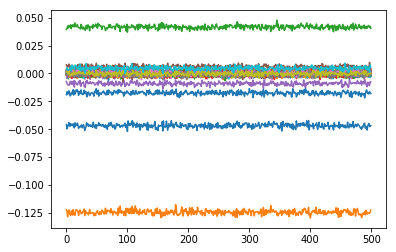

In [60]:
plt.plot(results[:,:,0])
plt.show()

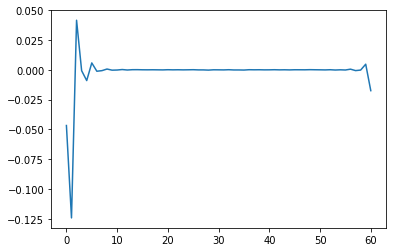

In [61]:
plt.plot(results[:,:,0].mean(axis=0))

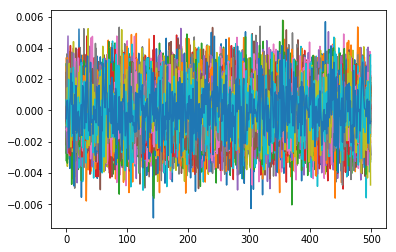

In [63]:
plt.plot(results[:,:,1])
plt.show()

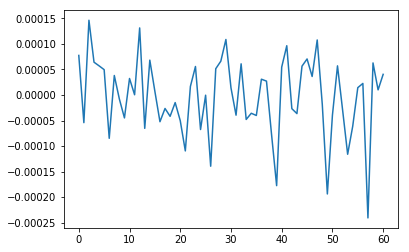

In [64]:
plt.plot(results[:,:,1].mean(axis=0))
plt.show()

In [65]:
F_plus=results[:,:,0].mean(axis=0)
F_minous=results[:,:,1].mean(axis=0)

In [107]:
toeplitz_row=np.roll(F_plus,-1)[::-1][:L]
toeplitz_column=F_plus[:L]
hankel_column = F_minous[:L]
hankel_row = F_minous[L-1:]

In [111]:
New_cov_matrix=toeplitz(toeplitz_column,toeplitz_row)+hankel(hankel_column,hankel_row)

In [112]:
O_1,S,O_2=np.linalg.svd(New_cov_matrix)
S=-S+0.5
x=np.log((1-S)/(S))

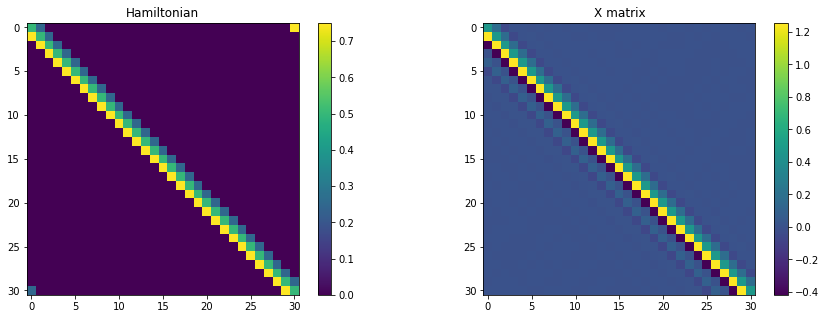

In [115]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(A)
plt.colorbar()
plt.title("Hamiltonian")
plt.subplot(1,2,2)
plt.title("X matrix")
M=(-(O_1@np.diag(x)/beta@O_2).real)
plt.imshow(M)
plt.colorbar()
plt.show()

# that didn't work

In [117]:
tests=500
N_size=50001
L=31
M=np.zeros((L,L))
for test in range(tests):
    print("Test number {}".format(test))
    a,b=Get_Bands_Matrix(Ground=False,N_size=N_size)
    New_cov_matrix=Covariance_matrix_from_sub_sample(a,b,L)
    O_1,S,O_2=np.linalg.svd(New_cov_matrix)
    S=-S+0.5
    x=np.log((1-S)/(S))
    M+=(-(O_1@np.diag(x)/beta@O_2).real)/tests

Test number 0
Test number 1
Test number 2
Test number 3
Test number 4
Test number 5
Test number 6
Test number 7
Test number 8
Test number 9
Test number 10
Test number 11
Test number 12
Test number 13
Test number 14
Test number 15
Test number 16
Test number 17
Test number 18
Test number 19
Test number 20
Test number 21
Test number 22
Test number 23
Test number 24
Test number 25
Test number 26
Test number 27
Test number 28
Test number 29
Test number 30
Test number 31
Test number 32
Test number 33
Test number 34
Test number 35
Test number 36
Test number 37
Test number 38
Test number 39
Test number 40
Test number 41
Test number 42
Test number 43
Test number 44
Test number 45
Test number 46
Test number 47
Test number 48
Test number 49
Test number 50
Test number 51
Test number 52
Test number 53
Test number 54
Test number 55
Test number 56
Test number 57
Test number 58
Test number 59
Test number 60
Test number 61
Test number 62
Test number 63
Test number 64
Test number 65
Test number 66
Test 

In [124]:
N_size=100001
a,b=Get_Bands_Matrix(Ground=False,N_size=N_size)
New_cov_matrix=Covariance_matrix_from_sub_sample(a,b,L)
O_1,S,O_2=np.linalg.svd(New_cov_matrix)
S=-S+0.5
x=np.log((1-S)/(S))

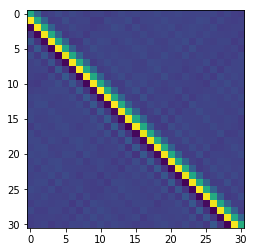

In [125]:
plt.imshow(-(O_1@np.diag(x)/beta@O_2).real)

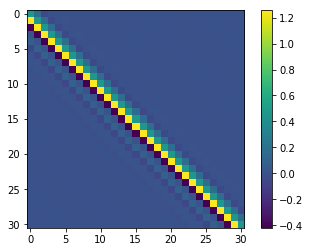

In [127]:
plt.imshow(M)
plt.colorbar()

array([0.47219757, 0.47459748, 0.47337479, 0.47425435, 0.47363942,
       0.47477151, 0.47376005, 0.47438878, 0.47445733, 0.47401936,
       0.47561867, 0.47312205, 0.47383731, 0.47400592, 0.47395924,
       0.47401212, 0.47419199, 0.47461784, 0.47340894, 0.47417321,
       0.47364263, 0.47482251, 0.47498197, 0.4742632 , 0.47441403,
       0.4748756 , 0.47447002, 0.47491934, 0.4723805 , 0.47470158,
       0.47139373])